In [2]:
!pip install pandas numpy scikit-learn matplotlib seaborn geopy


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Importing the Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from geopy.distance import geodesic


Loading the Dataset

In [4]:
df = pd.read_csv("medical_dataset.csv")
df.head()


,Patient_ID,Age,Gender,Symptom_1,Symptom_2,Symptom_3,Heart_Rate_bpm,Body_Temperature_C,Blood_Pressure_mmHg,Oxygen_Saturation_%,Diagnosis,Severity,Treatment_Plan
0,1,74,Male,Fatigue,Sore throat,Fever,69,39.4,132/91,94,Flu,Moderate,Medication and rest
1,2,66,Female,Sore throat,Fatigue,Cough,95,39.0,174/98,98,Healthy,Mild,Rest and fluids
2,3,32,Male,Body ache,Sore throat,Fatigue,77,36.8,136/60,96,Healthy,Mild,Rest and fluids
3,4,21,Female,Shortness of breath,Headache,Cough,72,38.9,147/82,99,Healthy,Mild,Rest and fluids
4,5,53,Male,Runny nose,Sore throat,Fatigue,100,36.6,109/106,92,Healthy,Mild,Rest and fluids


DATA CLEANING & PREPROCESSINGNG

In [5]:
df.columns = [
    'Patient_ID', 'Age', 'Gender',
    'Symptom_1', 'Symptom_2', 'Symptom_3',
    'Heart_Rate', 'Body_Temp',
    'Blood_Pressure', 'Oxygen_Sat',
    'Diagnosis', 'Severity', 'Treatment'
]


Split blood pressure

In [6]:
df[['BP_Systolic', 'BP_Diastolic']] = (
    df['Blood_Pressure'].str.split('/', expand=True).astype(int)
)
df.drop('Blood_Pressure', axis=1, inplace=True)


Drop non-ML columns

In [7]:
df_model = df.drop(['Patient_ID', 'Diagnosis', 'Treatment'], axis=1)


3. EXPLORATORY DATA ANALYSIS (EDA)

In [8]:
df_model.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2000 non-null   int64  
 1   Gender        2000 non-null   object 
 2   Symptom_1     2000 non-null   object 
 3   Symptom_2     2000 non-null   object 
 4   Symptom_3     2000 non-null   object 
 5   Heart_Rate    2000 non-null   int64  
 6   Body_Temp     2000 non-null   float64
 7   Oxygen_Sat    2000 non-null   int64  
 8   Severity      2000 non-null   object 
 9   BP_Systolic   2000 non-null   int64  
 10  BP_Diastolic  2000 non-null   int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 172.0+ KB


Severity distribution

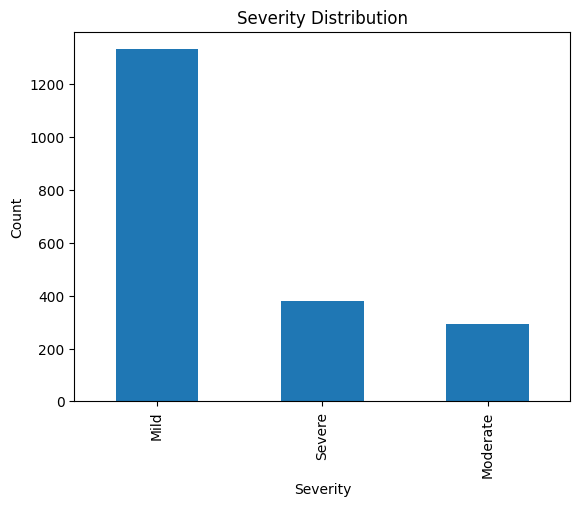

In [9]:
df['Severity'].value_counts().plot(kind='bar')
plt.title("Severity Distribution")
plt.xlabel("Severity")
plt.ylabel("Count")
plt.show()


Vital signs statistics

In [10]:
df[['Heart_Rate', 'Body_Temp', 'Oxygen_Sat', 'BP_Systolic', 'BP_Diastolic']].describe()


,Heart_Rate,Body_Temp,Oxygen_Sat,BP_Systolic,BP_Diastolic
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,89.439000,37.741000,94.493500,135.731500,89.338500
std,17.139608,1.309835,2.861827,25.983879,17.295707
min,60.000000,35.500000,90.000000,90.000000,60.000000
25%,75.000000,36.600000,92.000000,114.000000,75.000000
50%,89.000000,37.700000,95.000000,136.500000,90.000000
75%,104.000000,38.900000,97.000000,159.000000,104.000000
max,119.000000,40.000000,99.000000,179.000000,119.000000


4 — ENCODING

In [11]:
le_gender = LabelEncoder()
df_model['Gender'] = le_gender.fit_transform(df_model['Gender'])


Encode Severity (TARGET)

In [12]:
le_severity = LabelEncoder()
df_model['Severity'] = le_severity.fit_transform(df_model['Severity'])


One-hot encode symptoms

In [13]:
df_model = pd.get_dummies(
    df_model,
    columns=['Symptom_1', 'Symptom_2', 'Symptom_3']
)


5 — TRAIN / TEST SPLIT

In [14]:
X = df_model.drop('Severity', axis=1)
y = df_model['Severity']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.dtypes.unique()


array([dtype('int64'), dtype('float64'), dtype('bool')], dtype=object)

SCHEMA FOR LIVE DEMO

In [15]:
feature_columns = X.columns.tolist()


6 — BASELINE MODEL (MANDATORY)

In [16]:
baseline = LogisticRegression(max_iter=1000)
baseline.fit(X_train, y_train)

y_pred_base = baseline.predict(X_test)

print("Baseline Accuracy:", accuracy_score(y_test, y_pred_base))
print(classification_report(y_test, y_pred_base, target_names=le_severity.classes_))


Baseline Accuracy: 0.8075
              precision    recall  f1-score   support

        Mild       0.88      0.90      0.89       267
    Moderate       0.56      0.59      0.57        58
      Severe       0.75      0.64      0.69        75

    accuracy                           0.81       400
   macro avg       0.73      0.71      0.72       400
weighted avg       0.81      0.81      0.81       400



C:\Users\rapol\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


7 — ADVANCED MODELS

Random Forest

In [17]:
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

rf_acc = accuracy_score(y_test, y_pred_rf)
rf_acc


0.985

Gradient Boosting

In [18]:
gb = GradientBoostingClassifier(n_estimators=150, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

gb_acc = accuracy_score(y_test, y_pred_gb)
gb_acc


1.0

Neural Network (MLP)

In [19]:
mlp = MLPClassifier(hidden_layer_sizes=(100,50), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

mlp_acc = accuracy_score(y_test, y_pred_mlp)
mlp_acc


0.7725

8 — MODEL COMPARISON

In [20]:
pd.DataFrame({
    "Model": [
        "Logistic Regression (Baseline)",
        "Random Forest",
        "Gradient Boosting",
        "Neural Network"
    ],
    "Accuracy": [
        accuracy_score(y_test, y_pred_base),
        rf_acc,
        gb_acc,
        mlp_acc
    ]
}).sort_values(by="Accuracy", ascending=False)


,Model,Accuracy
2,Gradient Boosting,1.0000
1,Random Forest,0.9850
0,Logistic Regression (Baseline),0.8075
3,Neural Network,0.7725


9 — OPTIMIZATION / FINE-TUNING

In [21]:
rf_tuned = RandomForestClassifier(
    n_estimators=400,
    max_depth=10,
    min_samples_split=5,
    random_state=42
)

rf_tuned.fit(X_train, y_train)
accuracy_score(y_test, rf_tuned.predict(X_test))


0.9775

10 — LOCATION DATA (SYNTHETIC)

In [22]:
hospitals = pd.DataFrame({
    "Hospital": ["City Clinic", "Care Hospital", "Emergency Center"],
    "Latitude": [19.0760, 19.0896, 19.0700],
    "Longitude": [72.8777, 72.8656, 72.9000],
    "Type": ["Clinic", "Hospital", "Emergency"]
})


11 — DECISION LOGIC (HYBRID ML + RULES)

In [23]:
def rule_override(hr, temp, oxy, bp):
    if oxy < 88 or hr > 120 or temp > 39 or bp > 160:
        return "Severe"
    return None


12 — LIVE DEMO (MANUAL INPUT)

In [ ]:
def interactive_demo():
    age = int(input("Age: "))
    gender = input("Gender (Male/Female): ").strip().capitalize()
    symptoms = input("Symptoms (comma separated): ").split(",")

    heart_rate = int(input("Heart Rate: "))
    temp = float(input("Body Temperature: "))
    oxygen = int(input("Oxygen Saturation: "))
    bp_sys = int(input("BP Systolic: "))
    bp_dia = int(input("BP Diastolic: "))
    lat = float(input("Latitude: "))
    lon = float(input("Longitude: "))

    # ---- SAFE FEATURE DICTIONARY ----
    input_dict = dict.fromkeys(feature_columns, 0)

    input_dict['Age'] = age
    input_dict['Gender'] = le_gender.transform([gender])[0]
    input_dict['Heart_Rate'] = heart_rate
    input_dict['Body_Temp'] = temp
    input_dict['Oxygen_Sat'] = oxygen
    input_dict['BP_Systolic'] = bp_sys
    input_dict['BP_Diastolic'] = bp_dia

    # ---- ENCODE SYMPTOMS SAFELY ----
    for s in symptoms:
        s = s.strip().capitalize()
        for col in input_dict:
            if col.endswith("_" + s):
                input_dict[col] = 1

    input_df = pd.DataFrame([input_dict])

    # ---- RULE-BASED SAFETY OVERRIDE ----
    override = rule_override(heart_rate, temp, oxygen, bp_sys)

    if override:
        severity = override
    else:
        pred = rf_tuned.predict(input_df)[0]
        severity = le_severity.inverse_transform([pred])[0]

    print("\nSeverity:", severity)

    # ---- FINAL DECISION + LOCATION OUTPUT ----
    if severity == "Mild":
        print("Advice: First-aid at home. Rest, fluids, monitoring.")

    elif severity == "Moderate":
        print("Advice: Visit a clinic if no improvement in 2–3 days.")
        print("\nNearby Clinics / Hospitals:")
        display(find_nearest(lat, lon))

    else:
        print("Advice: EMERGENCY – go to nearest hospital immediately.")
        print("\nNearest Emergency Hospitals:")
        display(find_nearest(lat, lon, emergency=True))


In [27]:
from geopy.distance import geodesic

def find_nearest(lat, lon, emergency=False):
    user_location = (lat, lon)

    hospitals_copy = hospitals.copy()
    hospitals_copy["Distance_km"] = hospitals_copy.apply(
        lambda row: geodesic(
            user_location,
            (row["Latitude"], row["Longitude"])
        ).km,
        axis=1
    )

    if emergency:
        hospitals_copy = hospitals_copy[hospitals_copy["Type"] == "Emergency"]

    return hospitals_copy.sort_values("Distance_km")


In [28]:
find_nearest(19.0760, 72.8777)


,Hospital,Latitude,Longitude,Type,Distance_km
0,City Clinic,19.0760,72.8777,Clinic,0.000000
1,Care Hospital,19.0896,72.8656,Hospital,1.971765
2,Emergency Center,19.0700,72.9000,Emergency,2.439149


In [29]:
interactive_demo()



Severity: Severe
Advice: EMERGENCY – go to nearest hospital immediately.

Nearest Emergency Hospitals:


,Hospital,Latitude,Longitude,Type,Distance_km
2,Emergency Center,19.07,72.9,Emergency,4.220636
